In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [3]:
path = "C:\Arbeit\MikrowellenTr\Messungen\PGV\\O"

In [4]:
# the pore size dirtribution (PSD) is measured at various stages of drying with the help of vacuum freeze drying.
# these data are stored as ".xls" data. however the format cannot sumply be imported as dataframe by pandas.
# consequently they are stored in a dictionary with their corresponding water content.
# the following section automates reading said data into python environment and is used for other data from the mercury porosimetry device.
X_Content = [0.19,0.16,0.13,0.1,0.7,0.4]
for j in range(1,len(X_Content)+1):
    wb = xlrd.open_workbook(path+str(j)+".xls")
    sheet = wb.sheet_by_index(0)
    
    a=sheet.col_values(8)
    b=sheet.col_values(11)
    
    for i,k in enumerate(a):
        if type(k) == float:
            FinalInd = i
        
    for i in range(FinalInd):
        if (type(a[i]) != float) & (type(a[i+1]) == float):
            FirstInd = i+1
            break
    if j==1:        
        DICT = {'PoreRad (1e6) X='+str(X_Content[j-1]): a[FirstInd:FinalInd+1],
           'PoreVol (ml/g) X='+str(X_Content[j-1]): b[FirstInd:FinalInd+1]}
        KEYS = ['PoreRad (1e6) X='+str(X_Content[j-1]),'PoreVol (ml/g) X='+str(X_Content[j-1])]
    else:
        DICT1 = {'PoreRad (1e6) X='+str(X_Content[j-1]): a[FirstInd:FinalInd+1],
           'PoreVol (ml/g) X='+str(X_Content[j-1]): b[FirstInd:FinalInd+1]}
        DICT.update(DICT1)
        KEYS = KEYS+['PoreRad (1e6) X='+str(X_Content[j-1])]+['PoreVol (ml/g) X='+str(X_Content[j-1])]
    

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


Text(0, 0.5, 'Frequency (-)')

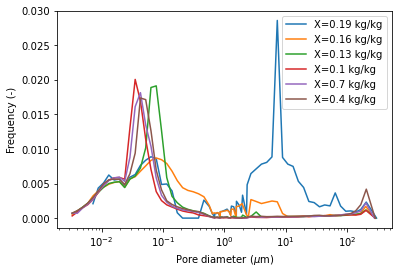

In [9]:
# the PSD data for each water content are plotted in a semi-logarithmic scale.
for i in range(1,len(X_Content)+1):
    plt.plot(DICT[KEYS[2*i-2]],DICT[KEYS[2*i-1]],label='X='+str(X_Content[i-1])+' kg/kg')
    plt.xscale("log")

plt.legend()
plt.xlabel(r"Pore diameter ($\mu$m)")
plt.ylabel("Frequency (-)")